# 4. Final Spectral and Lightcurve Extraction (Script 04)

This is the final script for the PN Timing Mode data data reduction. Now that I have confirmed all the correct spatial regions and pile-up filters from Step 3, I will use 04_extract_spectrum.sh to produce the final, science-ready products.

I have manually edited scripts/04_extract_spectrum.sh to set the "USER CONFIGURATION" block with the values I just found:

    IS_PILED_UP="yes"

    SRC_RAWX_FILTER_STD="RAWX in [27:47]"

    BKG_RAWX_FILTER="RAWX in [3:5]"

    SRC_EXCISION_FILTER="!(RAWX in [36:38])"

This script will now:

    Apply Barycentric Correction: It first checks for a no_barycorr_pn_clean.fits backup. If the backup does not exist, it creates one from pn_clean.evt. It then runs the SAS barycen task in-place on pn_clean.evt to apply the correction. (This logic protects the original file from being re-corrected on subsequent runs).

    Extract Spectra & Responses:

        Extracts the source spectrum using the piled-up region.

        Extracts the background spectrum.

        Generates the RMF.

        Generates the pile-up-corrected ARF by creating and subtracting ARFs from the full and inner regions.

    Extract Lightcurve:

        Extracts the raw source and background lightcurves.

        Runs epiclccorr to produce the final, corrected source lightcurve for timing analysis.

    Group & Plot:

        Groups the final spectrum.

        Generates plots of the raw and corrected lightcurves using the HEASOFT task fplot.

Environment Note for Jupyter/PyCharm

When running this notebook, the environment must be correctly set up. The script calls both SAS (barycen, evselect) and HEASOFT (fplot) tasks. A conflict exists between the SAS barycen and the HEASOFT barycen.

To fix this, I have modified the notebook's Python environment (using os.environ) to prepend the SAS binary directory to the system PATH. This ensures the correct SAS barycen is found and executed by the script, while the script itself correctly sets the $PFILES variable for the HEASOFT tasks..

In [2]:
import os

os.environ["PATH"] = f"{os.environ['SAS_DIR']}/bin:" + os.environ["PATH"] #ensures SAS barycen task is used and not Heasoft one
os.environ['PROJECT_ROOT'] = '/media/kyle/kyle_phd/Swift-j1858.6-0814/'
os.environ['OBSID'] = '/0865600201'

In [17]:

# This is the final extraction step, run once.
!../scripts/04_extract_spectrum.sh > logs/04_extract_spectrum.log 2>&1


Spectral and Lightcurve extraction complete for ObsID 0865600201.

### 4a. Sanity Check: Inspect Final Lightcurve

The script has successfully created all products, including a plot of the final, corrected lightcurve. I will display it here as a final check that the data is clean and the corrections were applied properly.

Displaying final corrected lightcurve: /media/kyle/kyle_phd/Swift-j1858.6-0814//products//0865600201/pn/lc/pn_source_lc_corrected.png


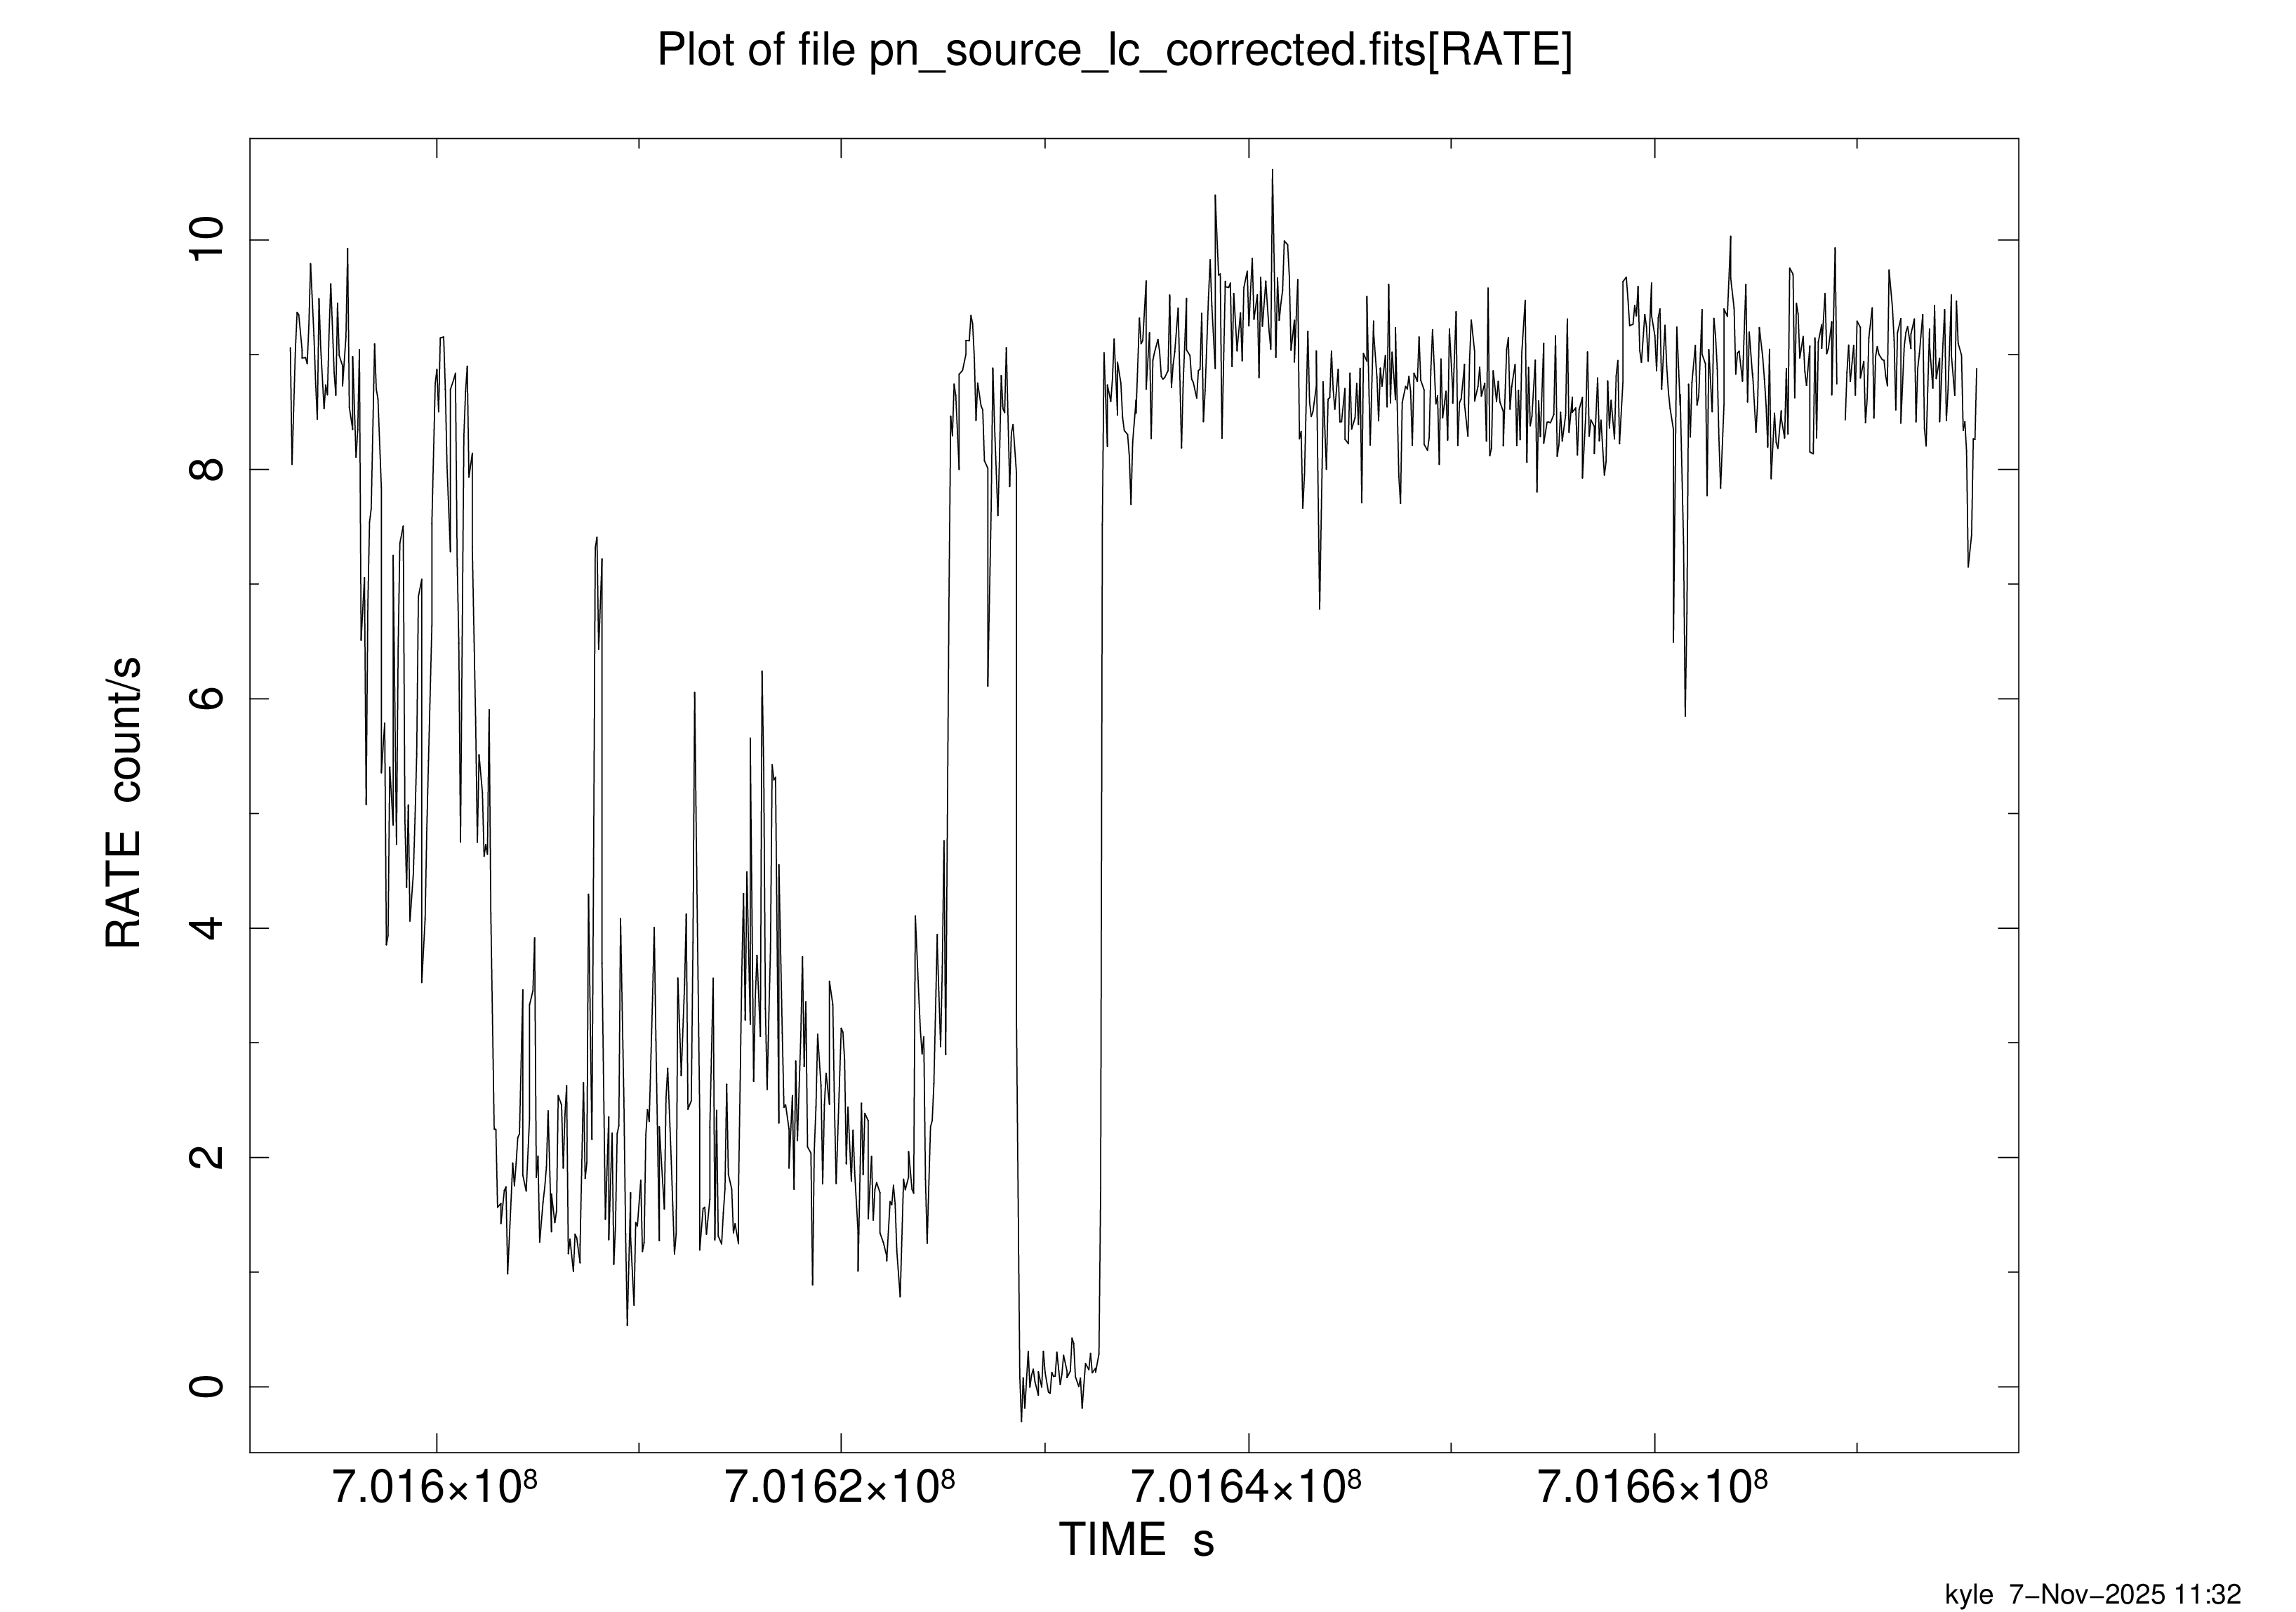

In [3]:
import os
from PIL import Image
from IPython.display import Image as IPyImage, display
from io import BytesIO


project_root = os.environ.get('PROJECT_ROOT')
obsid = os.environ.get('OBSID')



lc_plot_path = f"{project_root}/products/{obsid}/pn/lc/pn_source_lc_corrected.png"

if os.path.exists(lc_plot_path):
    img = Image.open(lc_plot_path)
    rotated = img.rotate(-90, expand=True)  # rotate 90 degrees anticlockwise
    buf = BytesIO()
    rotated.save(buf, format='PNG')
    buf.seek(0)
    print(f"Displaying final corrected lightcurve: {lc_plot_path}")
    display(IPyImage(data=buf.getvalue(), width=800))
else:
    print(f"ERROR: Plot not found at {lc_plot_path}")

#



### 4b. Final Conclusion

The script has finished successfully. The primary data reduction for the EPIC-pn observation is now complete.

All science-ready files are located in products/0865600201/pn/:

    For Spectral Fitting (in spec/):

        pn_source_spectrum_grp.fits

        pn_bkg_spectrum.fits

        pn_rmf.rmf

        pn_arf.arf

    For Timing Analysis (in lc/):

        pn_source_lc_corrected.fits

These files are now ready to be loaded into analysis tools like XSPEC.